In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\kamal\\Desktop\\project Dog and CAT\\dogs_vs_cats\\train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(128,128)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\kamal\\Desktop\\project Dog and CAT\\dogs_vs_cats\\test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(128,128)
)

Found 19000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10


594/594 [==============================] - 488s 815ms/step - loss: 0.8553 - accuracy: 0.6312 - val_loss: 0.6580 - val_accuracy: 0.6788
Epoch 2/10
594/594 [==============================] - 451s 759ms/step - loss: 0.5063 - accuracy: 0.7645 - val_loss: 0.4791 - val_accuracy: 0.7810
Epoch 3/10
594/594 [==============================] - 466s 783ms/step - loss: 0.4103 - accuracy: 0.8165 - val_loss: 0.5419 - val_accuracy: 0.7532
Epoch 4/10
594/594 [==============================] - 398s 669ms/step - loss: 0.3241 - accuracy: 0.8632 - val_loss: 0.8708 - val_accuracy: 0.5788
Epoch 5/10
594/594 [==============================] - 500s 842ms/step - loss: 0.2461 - accuracy: 0.9005 - val_loss: 0.4966 - val_accuracy: 0.7800
Epoch 6/10
594/594 [==============================] - 411s 692ms/step - loss: 0.1787 - accuracy: 0.9289 - val_loss: 1.2289 - val_accuracy: 0.6410
Epoch 7/10
594/594 [==============================] - 477s 803ms/step - loss: 0.1329 - accuracy: 0.9502 - val_loss: 0.7490

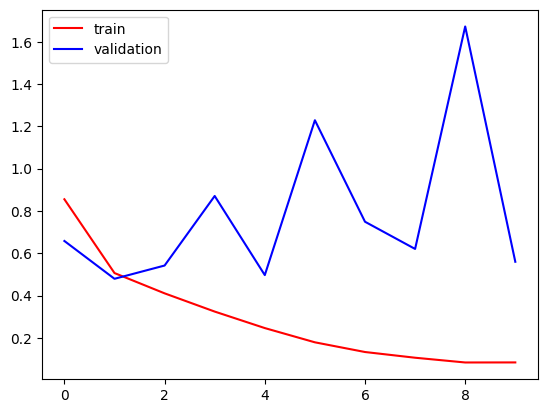

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

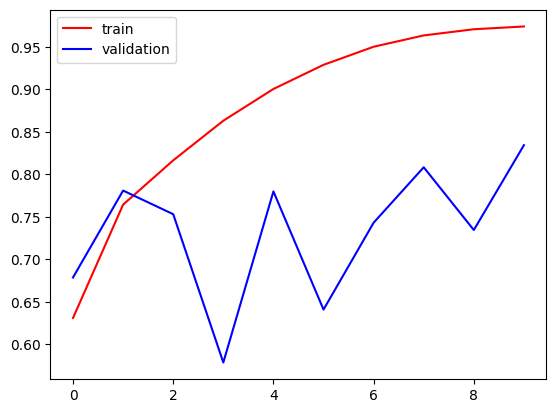

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
# There is a overfitting we have already applied techniques like batch normalization, dropout
# but still occuring overfitting

In [15]:
# Applying Augmentation Process

In [16]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=32


In [17]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    'dogs_vs_cats\\train',
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='binary',

)
validation_generator = test_datagen.flow_from_directory(
        'C:\\Users\\kamal\\Desktop\\project Dog and CAT\\dogs_vs_cats\\validation',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')



Found 19000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history=model.fit(
        train_generator,
        steps_per_epoch=2000//batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=800//batch_size)

Epoch 1/30
62/62 [==============================] - 48s 754ms/step - loss: 0.3694 - accuracy: 0.8543 - val_loss: 0.4686 - val_accuracy: 0.7638
Epoch 2/30
62/62 [==============================] - 46s 734ms/step - loss: 0.3283 - accuracy: 0.8775 - val_loss: 0.3608 - val_accuracy: 0.8550
Epoch 3/30
62/62 [==============================] - 46s 735ms/step - loss: 0.3022 - accuracy: 0.8760 - val_loss: 0.7060 - val_accuracy: 0.7425
Epoch 4/30
62/62 [==============================] - 46s 737ms/step - loss: 0.2961 - accuracy: 0.8760 - val_loss: 0.4395 - val_accuracy: 0.8375
Epoch 5/30
62/62 [==============================] - 46s 735ms/step - loss: 0.2786 - accuracy: 0.8876 - val_loss: 0.5293 - val_accuracy: 0.7713
Epoch 6/30
62/62 [==============================] - 45s 729ms/step - loss: 0.2929 - accuracy: 0.8851 - val_loss: 0.4040 - val_accuracy: 0.8300
Epoch 7/30
62/62 [==============================] - 45s 729ms/step - loss: 0.2979 - accuracy: 0.8821 - val_loss: 0.3850 - val_accuracy: 0.8587

In [ ]:
# we got accuracy of 88 percentile and there is no any kind of overfitting

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

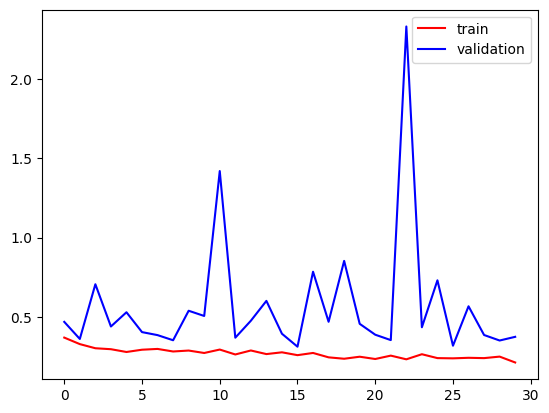

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image

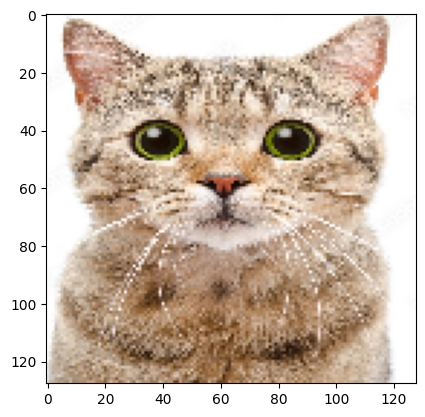

In [22]:
img=image.load_img('test image for cat.jpg',target_size=(128,128))
img=image.img_to_array(img)
img=img/255
plt.imshow(img)



In [23]:
img.shape


(128, 128, 3)

In [24]:
img=img.reshape(1,128,128,3)

In [25]:
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
# Classification for dogs probs=1 and for cats=0

1/1 [==============================] - 0s 270ms/step


In [26]:

if prediction>0.5:
    print("Dog")
else:
    print("Cat")

Dog


In [ ]:
img2=image.load_img('dog_image_classification_task.jpeg',target_size=(128,128))
img2=image.img_to_array(img2)
img2=img2/255
img2=img2.reshape(1,128,128,3)
plt.imshow(img2)

In [28]:
result=model.predict(img2,batch_size=None,steps=1)
if result>0.5:
    print("The image is of Dog")
else:
    print("It's a Cat")



: 